<a href="https://colab.research.google.com/github/widiarsaf/Final_project_pcvk/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
train_path = '/content/drive/MyDrive/KULIAH/PCVK/final_project/train'
test_path = '/content/drive/MyDrive/KULIAH/PCVK/final_project/test'


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import math
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from keras import optimizers


In [48]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model,load_model
conv_base =  InceptionV3(weights='imagenet',include_top=False,
                         input_shape=(300, 300, 3))
output = conv_base.layers[-1].output
output = keras.layers.Flatten()(output)
model_tl = Model(conv_base.input, output)
model_tl.trainable = False
for layer in model_tl.layers:
    layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in  
               model_tl.layers]
model_layers=pd.DataFrame(layers, columns=['Layer Type', 'Layer  Name', 'Layer Trainable'])
print(model_layers) 

                                            Layer Type  \
0    <keras.engine.input_layer.InputLayer object at...   
1    <keras.layers.convolutional.Conv2D object at 0...   
2    <keras.layers.normalization.batch_normalizatio...   
3    <keras.layers.core.activation.Activation objec...   
4    <keras.layers.convolutional.Conv2D object at 0...   
..                                                 ...   
307  <keras.layers.merge.Concatenate object at 0x7f...   
308  <keras.layers.merge.Concatenate object at 0x7f...   
309  <keras.layers.core.activation.Activation objec...   
310  <keras.layers.merge.Concatenate object at 0x7f...   
311  <keras.layers.core.flatten.Flatten object at 0...   

                 Layer  Name  Layer Trainable  
0                    input_6            False  
1                 conv2d_470            False  
2    batch_normalization_470            False  
3             activation_470            False  
4                 conv2d_471            False  
..             

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
test_size=12
batch_size=4
epochs=25
train_path='/content/drive/MyDrive/KULIAH/PCVK/final_project/train'
test_path='/content/drive/MyDrive/KULIAH/PCVK/final_project/test'
target_size=(300,300)
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,  
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range = [0.8, 1.2],
                                   fill_mode='nearest',        
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                  train_path,
                  target_size=target_size,#  
                  batch_size=batch_size,
                  class_mode='categorical',
                  subset='training')
validation_generator = train_datagen.flow_from_directory(
                       train_path,
                       target_size=target_size,
                       batch_size=batch_size,
                       class_mode='categorical',
                       subset='validation')

Found 30 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [50]:
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import optimizers
# building a linear stack of layers with the sequential model
model =Sequential()
model.add(model_tl)
# hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(3, activation='softmax'))
# compiling the sequential model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_5 (Functional)        (None, 131072)            21802784  
                                                                 
 dense_20 (Dense)            (None, 64)                8388672   
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 3)                 195       
                                                                 
Total params: 30,191,651
Trainable params: 8,388,867
Non-trainable params: 21,802,784
_________________________________________________________________
None


In [51]:
from keras.callbacks import *
filepath="/content/drive/MyDrive/KULIAH/PCVK/final_project/MyCNN/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_acc', 
                             verbose=1,
                             save_best_only=False,
                             save_freq='epoch',     
                             mode='max')
callbacks_list = [checkpoint]

In [52]:
history = model.fit(
          train_generator,
          steps_per_epoch=train_generator.samples//batch_size,    
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          callbacks=callbacks_list)

Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 7.0739 - acc: 0.3214
Epoch 1: saving model to /content/drive/MyDrive/KULIAH/PCVK/final_project/MyCNN/epochs:001-val_acc:0.250.hdf5
7/7 [==============================] - 16s 2s/step - loss: 7.0739 - acc: 0.3214 - val_loss: 1.8933 - val_acc: 0.2500
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 1.2542 - acc: 0.5385
Epoch 2: saving model to /content/drive/MyDrive/KULIAH/PCVK/final_project/MyCNN/epochs:002-val_acc:0.750.hdf5
7/7 [==============================] - 10s 1s/step - loss: 1.2542 - acc: 0.5385 - val_loss: 0.7419 - val_acc: 0.7500
Epoch 3/25
7/7 [==============================] - ETA: 0s - loss: 0.8387 - acc: 0.6154
Epoch 3: saving model to /content/drive/MyDrive/KULIAH/PCVK/final_project/MyCNN/epochs:003-val_acc:0.750.hdf5
7/7 [==============================] - 10s 1s/step - loss: 0.8387 - acc: 0.6154 - val_loss: 0.6635 - val_acc: 0.7500
Epoch 4/25
7/7 [==============================] - ETA: 0s 

2/2 [==============================] - 2s 455ms/step - loss: 0.0065 - acc: 1.0000
Train Accuracy: 100.00%
Validation Accuracy: 100.00%


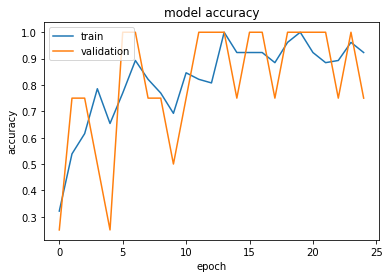

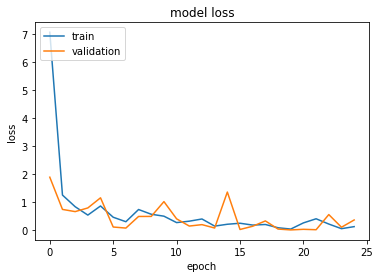

In [53]:
# Model evaluation
scores_train = model.evaluate(train_generator,verbose=1)
scores_validation = model.evaluate(validation_generator,verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))
#For plotting Accuracy and Loss
def LearningCurve(history):
# summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
# summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
LearningCurve(history)
#Save the trained model to a file 
model_weight_file='/content/drive/MyDrive/KULIAH/PCVK/final_project/MyCNN/leaf_img.h5'
model.save(model_weight_file)

Found 12 images belonging to 3 classes.
3/3 [==============================] - 5s 995ms/step
[[4 0 0]
 [0 3 1]
 [0 0 4]]
                        precision    recall  f1-score   support

    Cornus_Controversa       1.00      1.00      1.00         4
Eucalyptus_Glaucescens       1.00      0.75      0.86         4
       Fagus_Sylvatica       0.80      1.00      0.89         4

              accuracy                           0.92        12
             macro avg       0.93      0.92      0.92        12
          weighted avg       0.93      0.92      0.92        12



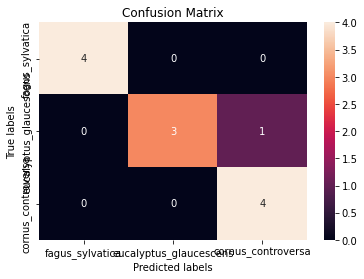

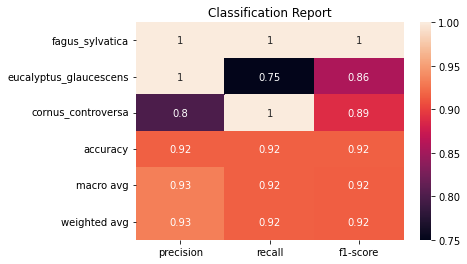

In [54]:
# We take the ceiling because we do not drop the remainder of the batch
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
test_steps = compute_steps_per_epoch(test_size)
test_generator = test_datagen.flow_from_directory(
                 test_path,
                 target_size=target_size, 
                 batch_size=batch_size,
                 class_mode=None,
                 shuffle=False)
test_generator.reset()
#Calling the saved model for making predictions
tl_img_aug_cnn = load_model(model_weight_file)
pred=tl_img_aug_cnn.predict(test_generator,
                            verbose=1,
                            steps=test_steps)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
#create a function for visualizing model performance
import seaborn as sns
def PerformanceReports(conf_matrix,class_report,labels):
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True,ax=ax)
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()
    ax= plt.subplot()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T,  
                annot=True,ax=ax)
    ax.set_title('Classification Report')
    plt.show()
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
labels=['fagus_sylvatica','eucalyptus_glaucescens','cornus_controversa']
test_labels = [fn.split('/')[0] for fn in filenames]
cm=confusion_matrix(test_labels,predictions)
print(cm)
cr=classification_report(test_labels, predictions)
class_report=classification_report(test_labels, predictions,
                                   target_names=labels,
                                   output_dict=True)
print(cr)
PerformanceReports(cm,class_report,labels)

Saving cornus_controversa_02.ab.jpg to cornus_controversa_02.ab.jpg
cornus_controversa_02.ab.jpg
eucalyptus_glaucescens


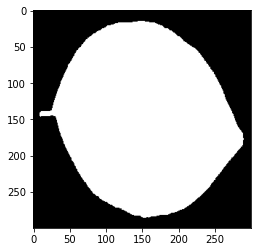

In [56]:
import numpy as np
from google.colab import files
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)

  print(fn)
  if classes[0,0]==1:
    print('fagus_sylvatica')
  elif classes[0,1]==1:
    print('eucalyptus_glaucescens')
  else:
    print('cornus_controversa')